In [14]:
import tensorflow as tf
import numpy as np
# Eigene Module
import visual as vis
import util
import model as md
import dataset as ds

In [29]:
# Definitionen für selbst generierte Daten (Modelle, Graphen, ...)
graphs_path = '../data/graphs/'
models_path = '../data/models/'
model_name = 'encoder.hdf5'

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 8)         80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 8)         32        
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 16)        1168

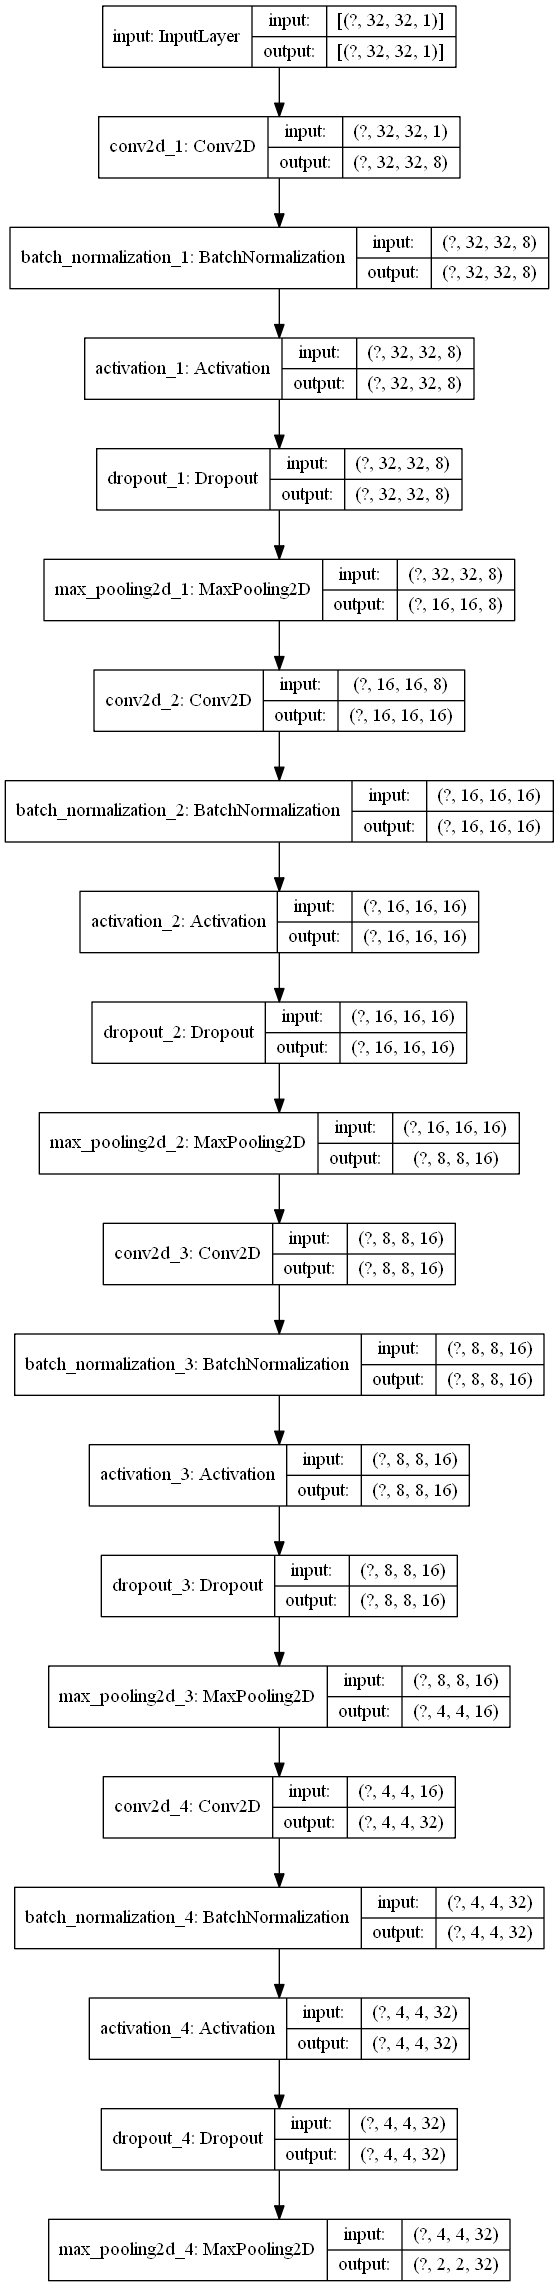

In [33]:
#model = tf.keras.models.load_model(models_path + model_name)
model = tf.keras.models.load_model(models_path + 'saved_' + model_name + '.hdf5')
model.summary()
tf.keras.utils.plot_model(model, graphs_path + model_name + '.png', show_shapes=True)

In [28]:
# Save Model as File
model.save(models_path + 'saved_' + model_name)

# Save as Format compatible with CompiledNN
model.save(models_path + 'saved_' + model_name + '.hdf5', save_format='h5')

# Convert and Save to TFLite Model
converter = tf.lite.TFLiteConverter.from_saved_model(models_path + model_name)
tflite_model = converter.convert()
with open(models_path + model_name + '.tflite', 'wb') as f:
  f.write(tflite_model)

OSError: SavedModel file does not exist at: ../data/models/encoder.hdf5/{saved_model.pbtxt|saved_model.pb}

In [20]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def plot_bbox(img, bbox):
    '''
    Plotte ein Bild mit eingezeichneter BBOX
    Input: Bild, BBOX
    Output: Kein Return, aber ausgabe des Plots
    '''
    plt.imshow(img, cmap='gray', vmin=0., vmax=1.)

    #w,h = bbox.astype('int')
    
    #bbox = Circle(w, h, linewidth=1, edgecolor='red', facecolor='none')
    #plt.gca().add_patch(bbox)
    #plt.text(x, y, str([x, y]), color='red')
    #print(bbox)
    plt.show()

[[[[0.3509129  0.0835751  0.         0.         1.2372267  0.
    0.         0.24059784 0.32803172 0.29038084 0.         0.08645869
    0.3107551  0.06389541 0.3441714  0.79441524 0.         0.3204993
    0.6981454  0.46259177 0.         0.14668302 0.74493766 0.8001015
    0.3748634  1.2269497  0.3998108  1.2844083  0.7100566  0.34695375
    1.4618573  0.39366215]
   [0.76014334 0.28154844 0.11966299 0.19167839 1.2802703  0.
    0.         0.6778957  0.8919343  0.54876417 0.         0.
    0.39046267 0.         0.25690022 1.0167894  0.         0.42002395
    0.6712374  1.1700897  0.         0.         0.62340486 0.
    0.5230402  0.7951645  0.6195458  1.1956152  0.5549468  0.4411419
    1.306982   0.8051966 ]]

  [[0.11012639 0.262125   0.07836864 0.         0.5424156  0.
    0.         0.5916429  1.1046091  0.5265364  0.         0.47403052
    0.40314132 0.26145837 0.         0.78838843 0.         0.
    0.34491277 0.5061592  0.07419292 0.12784308 0.52347535 0.9126539
    0.17595573 1

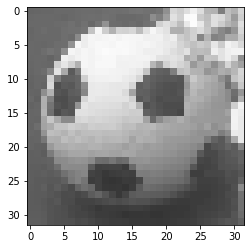

In [23]:
ds.target_size = (32, 32)
img = ds.parse_image('img_1733_crop_195_276_262_343.png', 'D:/workspace/datasets/real_ball/pos_top/')
pred = model.predict(np.expand_dims(img, axis=0))
print(pred)
plot_bbox(np.squeeze(img), pred[0])

In [ ]:
model.compile(loss="mse",
              #optimizer=optimizer, 
              optimizer="adam", 
              #metrics=["accuracy"]
              )
model.summary()
tf.keras.utils.plot_model(model, graphs_path + model_name + '.png', show_shapes=True)